In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/multi_featm_rfe_cicids.csv")

In [ ]:
X = df.drop(['Label'],axis=1)
y = df['Label']


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

#results storage and save function
results = {}



In [ ]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


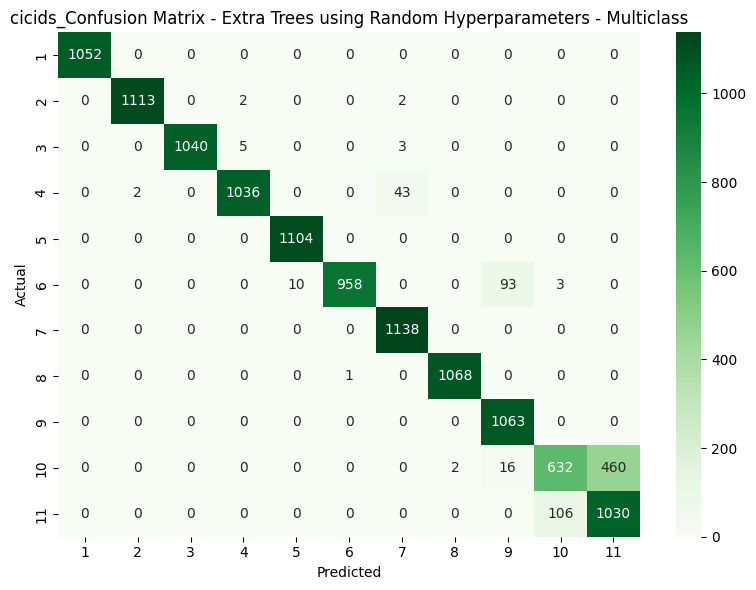

{'Accuracy': 0.9375730262059756, 'Precision': 0.9431491237291592, 'Recall': 0.9375730262059756, 'F1 Score': 0.9358669008581807}


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Encode labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)
n_classes = len(le.classes_)

# Train Extra Trees
et_model = ExtraTreesClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
et_model.fit(X_train, y_train_encoded)
y_pred_encoded = et_model.predict(X_test)
y_pred = le.inverse_transform(y_pred_encoded)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Save results
results["ExtraTrees"] = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}

# Confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred, labels=le.classes_)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("cicids_Confusion Matrix - Extra Trees using Random Hyperparameters - Multiclass")
plt.tight_layout()
plt.savefig("cicids_confusion_matrix_extratrees_usg_rand_Hyp_multiclass.png", dpi=800)
plt.show()
plt.close()

# Print Results
print(results["ExtraTrees"])


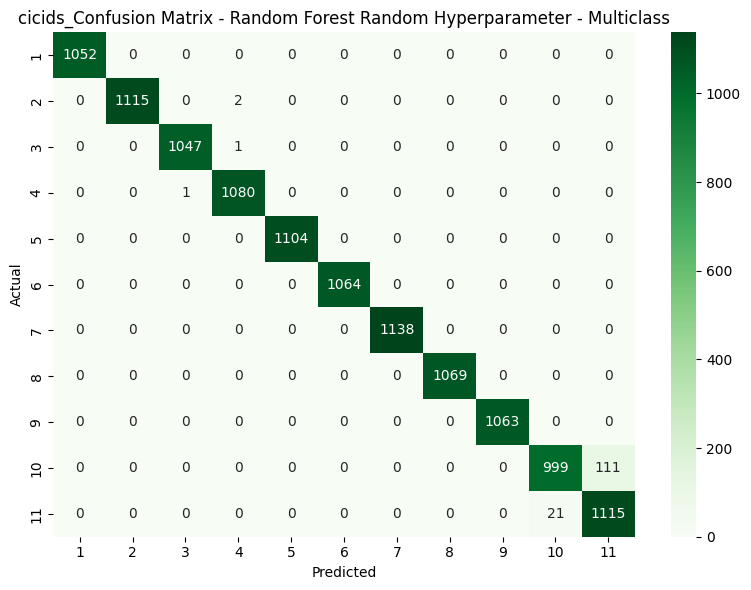

{'Accuracy': 0.9886496411283592, 'Precision': 0.9891755173789378, 'Recall': 0.9886496411283592, 'F1 Score': 0.9886268601175103}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Encode labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)
n_classes = len(le.classes_)

# Train Random Forest
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train_encoded)
y_pred_encoded = rf_model.predict(X_test)
y_pred = le.inverse_transform(y_pred_encoded)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Save results
results["RandomForest"] = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}

# Confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred, labels=le.classes_)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("cicids_Confusion Matrix - Random Forest Random Hyperparameter - Multiclass")
plt.tight_layout()
plt.savefig("cicids_confusion_matrix_randomforest_usg_rand_hyp_multiclass.png", dpi=800)
plt.show()
plt.close()

# Print Results
print(results["RandomForest"])


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.5 MB/s eta 0:00:00


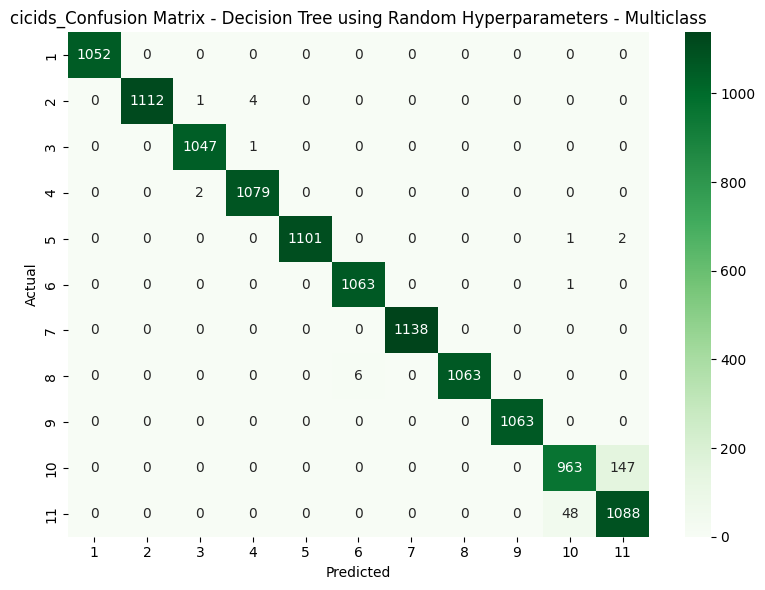

{'Accuracy': 0.9822233350025038, 'Precision': 0.9828430629217414, 'Recall': 0.9822233350025038, 'F1 Score': 0.9821975271968661}


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Encode target labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)
n_classes = len(le.classes_)

# Train Decision Tree
dt_model = DecisionTreeClassifier(
    max_depth=10,
    random_state=42
)
dt_model.fit(X_train, y_train_encoded)
y_pred_encoded = dt_model.predict(X_test)
y_pred = le.inverse_transform(y_pred_encoded)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Save results
results["DecisionTree"] = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}

# Confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred, labels=le.classes_)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("cicids_Confusion Matrix - Decision Tree using Random Hyperparameters - Multiclass")
plt.tight_layout()
plt.savefig("cicids_confusion_matrix_decisiontree_usg_rand_Hyp_multiclass.png", dpi=800)
plt.show()
plt.close()

# Print Results
print(results["DecisionTree"])


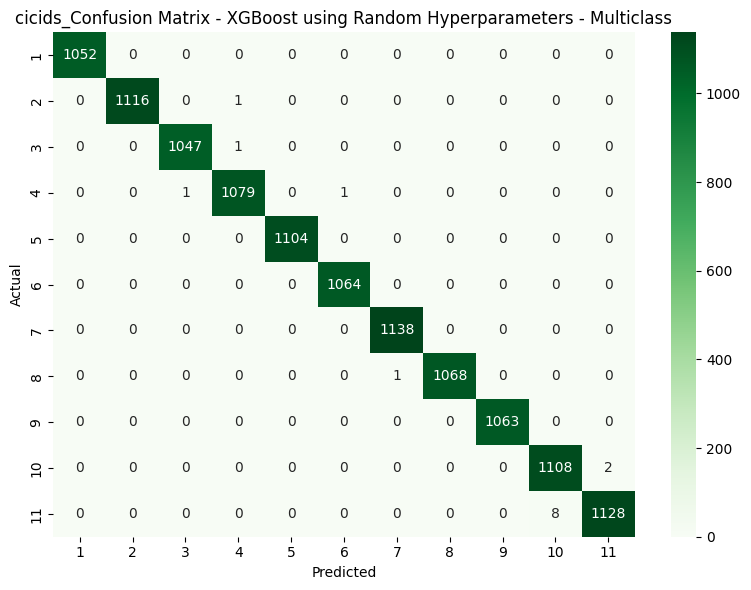

{'Accuracy': 0.9987481221832749, 'Precision': 0.9987509771502188, 'Recall': 0.9987481221832749, 'F1 Score': 0.9987481417504002}


In [ ]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Encode labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)
n_classes = len(le.classes_)

# Train XGBoost
xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=10,
    learning_rate=0.1,
    objective='multi:softprob',
    num_class=n_classes,
    random_state=42
)
xgb_model.fit(X_train, y_train_encoded)
y_pred_proba = xgb_model.predict_proba(X_test)
y_pred_encoded = np.argmax(y_pred_proba, axis=1)
y_pred = le.inverse_transform(y_pred_encoded)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Save results
results["XGBoost"] = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}

# Confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred, labels=le.classes_)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("cicids_Confusion Matrix - XGBoost using Random Hyperparameters - Multiclass")
plt.tight_layout()
plt.savefig("cicids_confusion_matrix_xgboost_usg_rand_hyp_multiclass.png", dpi=800)
plt.show()
plt.close()

# Print Results
print(results["XGBoost"])


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003975 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5096
[LightGBM] [Info] Number of data points in the train set: 47924, number of used features: 20
[LightGBM] [Info] Start training from score -2.389376
[LightGBM] [Info] Start training from score -2.404280
[LightGBM] [Info] Start training from score -2.388467
[LightGBM] [Info] Start training from score -2.395998
[LightGBM] [Info] Start training from score -2.401281
[LightGBM] [Info] Start training from score -2.392111
[LightGBM] [Info] Start training from score -2.409143
[LightGBM] [Info] Start training from score -2.393253
[LightGBM] [Info] Start training from score -2.391883
[LightGBM] [Info] Start training from score -2.402664
[LightGBM] [Info] Start tra

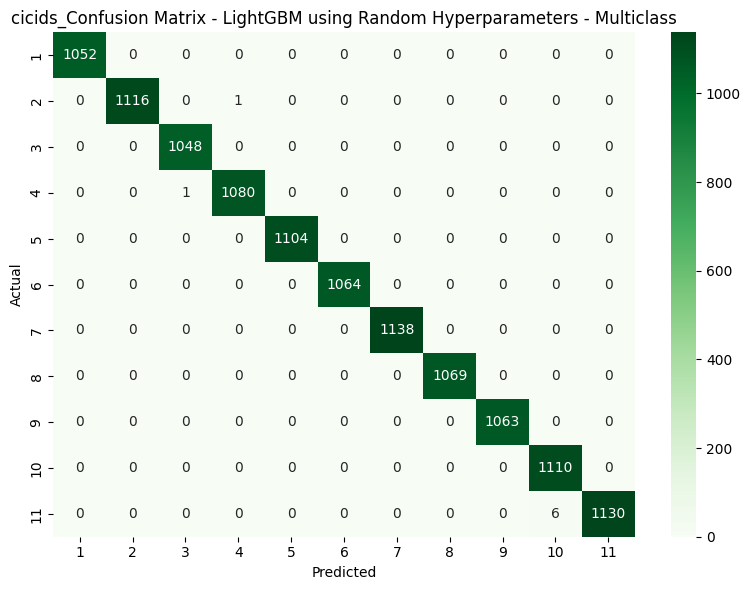

{'Accuracy': 0.99933233183108, 'Precision': 0.9993351036015158, 'Recall': 0.99933233183108, 'F1 Score': 0.9993323449559686}


In [ ]:
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Encode labels if needed
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)
n_classes = len(le.classes_)

# Train
lgb_model = LGBMClassifier(
    n_estimators=200,
    max_depth=10,
    learning_rate=0.1,
    objective='multiclass',
    num_class=n_classes,
    random_state=42
)
lgb_model.fit(X_train, y_train_encoded)
y_pred_encoded = lgb_model.predict(X_test)
y_pred = le.inverse_transform(y_pred_encoded)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Save results
results["Lightgbm"] = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}

# Confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred, labels=le.classes_)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("cicids_Confusion Matrix - LightGBM using Random Hyperparameters - Multiclass")
plt.tight_layout()
plt.savefig("cicids_confusion_matrix_lightgbm_usg_rand_hyp_multiclass.png", dpi=800)
plt.show()
plt.close()

# Print Results
print(results["Lightgbm"])


In [ ]:
!pip install catboost

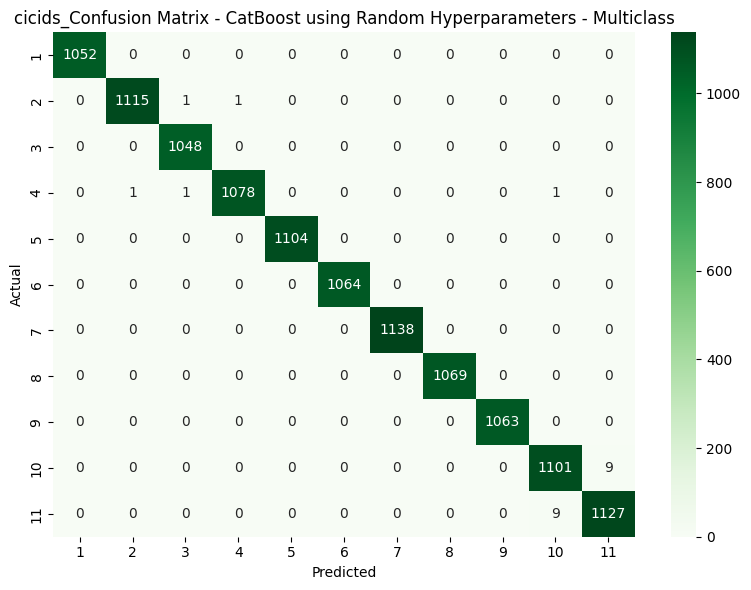

{'Accuracy': 0.9980804540143549, 'Precision': 0.9980812936737133, 'Recall': 0.9980804540143549, 'F1 Score': 0.9980806799405348}


In [ ]:
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Encode target labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)
n_classes = len(le.classes_)

# Train
cat_model = CatBoostClassifier(
    iterations=200,
    depth=10,
    learning_rate=0.1,
    loss_function='MultiClass',
    random_state=42,
    verbose=0
)
cat_model.fit(X_train, y_train_encoded)
y_pred_encoded = cat_model.predict(X_test).flatten().astype(int)
y_pred = le.inverse_transform(y_pred_encoded)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Save results
results["CatBoost"] = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}

# Confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred, labels=le.classes_)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("cicids_Confusion Matrix - CatBoost using Random Hyperparameters - Multiclass")
plt.tight_layout()
plt.savefig("cicids_confusion_matrix_catboost_usg_rand_hyp_multiclass.png", dpi=800)
plt.show()
plt.close()

# Print Results
print(results["CatBoost"])


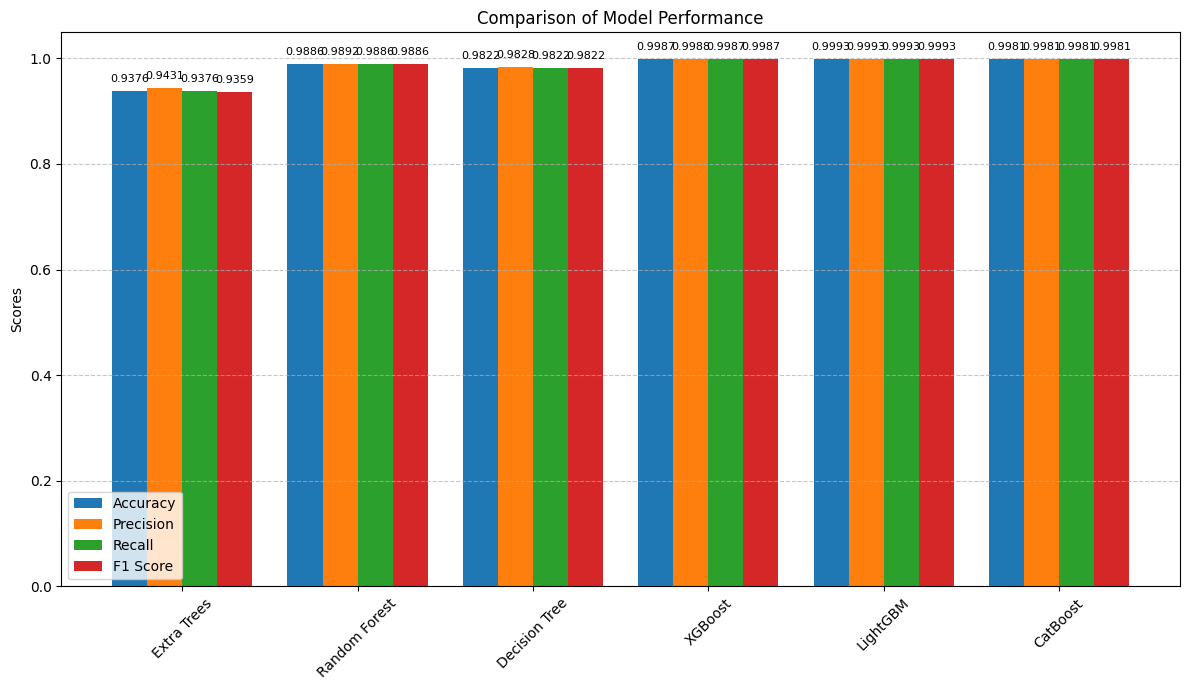

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Updated Metrics for each model
metrics = {
    'Extra Trees': {'Accuracy': 0.9376, 'Precision': 0.9431, 'Recall': 0.9376, 'F1 Score': 0.9359},
    'Random Forest': {'Accuracy': 0.9886, 'Precision': 0.9892, 'Recall': 0.9886, 'F1 Score': 0.9886},
    'Decision Tree': {'Accuracy': 0.9822, 'Precision': 0.9828, 'Recall': 0.9822, 'F1 Score': 0.9822},
    'XGBoost': {'Accuracy': 0.9987, 'Precision': 0.9988, 'Recall': 0.9987, 'F1 Score': 0.9987},
    'LightGBM': {'Accuracy': 0.9993, 'Precision': 0.9993, 'Recall': 0.9993, 'F1 Score': 0.9993},
    'CatBoost': {'Accuracy': 0.9981, 'Precision': 0.9981, 'Recall': 0.9981, 'F1 Score': 0.9981}
}

models = list(metrics.keys())
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Prepare data for plotting
data = {metric: [metrics[model][metric] for model in models] for metric in metric_names}

# Plotting
x = np.arange(len(models))  # label locations
width = 0.2  # width of the bars

fig, ax = plt.subplots(figsize=(12, 7))

# Create bars for each metric
rects1 = ax.bar(x - 1.5*width, data['Accuracy'], width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, data['Precision'], width, label='Precision')
rects3 = ax.bar(x + 0.5*width, data['Recall'], width, label='Recall')
rects4 = ax.bar(x + 1.5*width, data['F1 Score'], width, label='F1 Score')

# Labels and Title
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show values on bars
def autolabel(rects):
    """Attach a text label above each bar."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),  # 5 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

for rects in [rects1, rects2, rects3, rects4]:
    autolabel(rects)

fig.tight_layout()

# Save the plot with 800 dpi
plt.savefig('cicids_model_comparison_plot_usg_rand_hyp_binary_updated_final.png', dpi=800)

# If you also want to display the plot
plt.show()
